In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
from skimage import io
%matplotlib inline

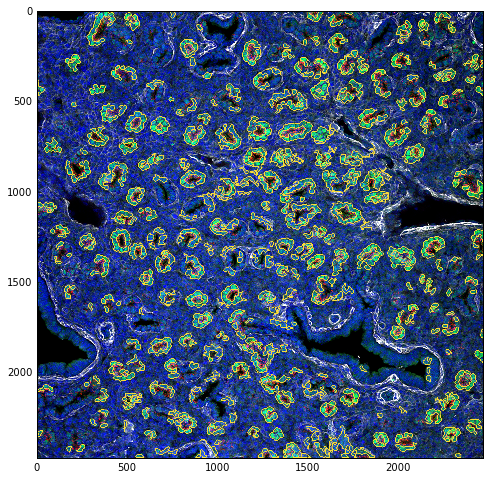

In [6]:
###Find acinar tubule#####
im = cv2.imread("./images/Examples/2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_003.tif")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
origin = im.copy()
filename=str("images/2015-003-026_60X_C57Bl6_E16.5_LMM.14.24.4.41_CSPG4_NKX2.1_ACTA2_001.tif")

R, G, B = cv2.split(im)
G_norm = cv2.normalize(G,G,0, 175, cv2.NORM_MINMAX)
#B_norm = cv2.normalize(B,B,150, 250, cv2.NORM_MINMAX)
im = cv2.merge((R, G_norm, B))
tmp = cv2.GaussianBlur(im, (33,33),0)
#tmp = cv2.GaussianBlur(im, (53,53),0)

# thresh for normalized imgs
#thresh = cv2.inRange(im, np.array([3,90,3]), np.array([80,255,220]))
thresh = cv2.inRange(tmp, np.array([0,55,40]), np.array([60,255,255]))

# find contours
c=0
finalcontours = []
#thresh = tmp
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(0, len(contours)):
    a = cv2.contourArea(contours[i])
    if (a>400):
        finalcontours.append(contours[i])
        c=c+1

# draw contours       
for ia in range(0, len(finalcontours)):
    temp2 = cv2.drawContours(origin,finalcontours,ia,(250,220,55),thickness=4, lineType=2,maxLevel=0)
plt.figure(figsize=(38, 8))
plt.imshow(temp2)